In [1]:
import random
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
from joblib import Parallel, delayed
from sklearn.preprocessing import LabelEncoder

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader

import warnings
warnings.filterwarnings("ignore")

In [2]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
device

device(type='cpu')

In [3]:
train=pd.read_csv('../DAT/train.csv')
test=pd.read_csv('../DAT/test.csv')

In [4]:
train=train.drop(columns='ID')
test=test.drop(columns='ID')

In [5]:
train.rename(columns={'supply(kg)' : 'supply',
                      'price(원/kg)' : 'price'}, inplace=True)
test.rename(columns={'supply(kg)' : 'supply'}, inplace=True)

In [6]:
train['timestamp']=pd.to_datetime(train['timestamp'])

for train in [train]:
    train['year']=train['timestamp'].dt.year
    train['month']=train['timestamp'].dt.month
    train['day']=train['timestamp'].dt.day
    train['weekdays']=train['timestamp'].dt.weekday

In [7]:
test['timestamp']=pd.to_datetime(test['timestamp'])

for test in [test]:
    test['year']=test['timestamp'].dt.year
    test['month']=test['timestamp'].dt.month
    test['day']=test['timestamp'].dt.day
    test['weekdays']=test['timestamp'].dt.weekday

In [8]:
import holidays
kr_holidays = holidays.KR()
# generate holiday table
train['holiday'] = train['timestamp'].apply(lambda x: 1 if x in kr_holidays else 0)
test['holiday'] = test['timestamp'].apply(lambda x: 1 if x in kr_holidays else 0)

In [9]:
train.loc[train['price']==0, 'price_zero']=1
train.loc[train['price']>0, 'price_zero']=0
train['price_zero']=train['price_zero'].astype('int')

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59397 entries, 0 to 59396
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   timestamp    59397 non-null  datetime64[ns]
 1   item         59397 non-null  object        
 2   corporation  59397 non-null  object        
 3   location     59397 non-null  object        
 4   supply       59397 non-null  float64       
 5   price        59397 non-null  float64       
 6   year         59397 non-null  int64         
 7   month        59397 non-null  int64         
 8   day          59397 non-null  int64         
 9   weekdays     59397 non-null  int64         
 10  holiday      59397 non-null  int64         
 11  price_zero   59397 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(5), object(3)
memory usage: 5.2+ MB


In [11]:
train_TG=train[train['item']=='TG']
train_BC=train[train['item']=='BC']
train_RD=train[train['item']=='RD']
train_CR=train[train['item']=='CR']
train_CB=train[train['item']=='CB']

In [12]:
test_TG=test[test['item']=='TG'].reset_index(drop=True)
test_BC=test[test['item']=='BC'].reset_index(drop=True)
test_RD=test[test['item']=='RD'].reset_index(drop=True)
test_CR=test[test['item']=='CR'].reset_index(drop=True)
test_CB=test[test['item']=='CB'].reset_index(drop=True)

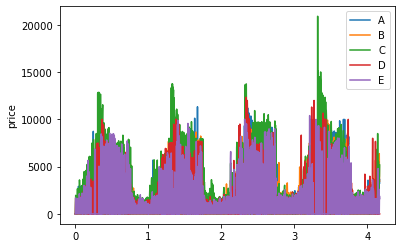

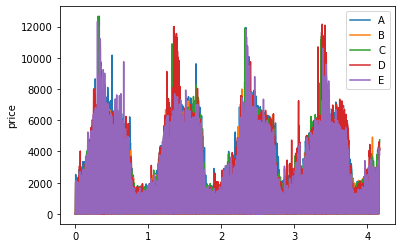

In [13]:
corp_list = train_TG['corporation'].unique().tolist()
loc_list = train_TG['location'].unique().tolist()
for loc in loc_list:
    for corp in corp_list:
        df = train_TG[(train_TG['corporation']==corp)&(train_TG['location']==loc)]
        sns.lineplot(x=df['timestamp'].reset_index().index/365, y='price', data=df)
    plt.legend(corp_list)
    plt.show()

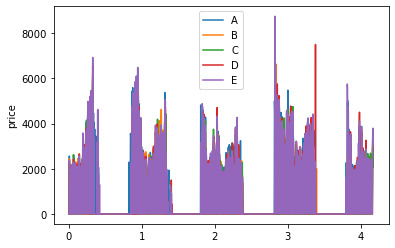

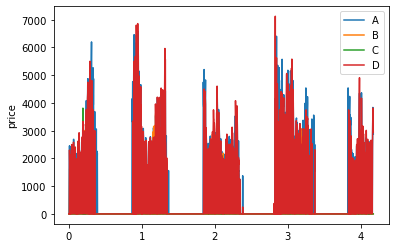

In [14]:
corp_list = train_BC['corporation'].unique().tolist()
loc_list = train_BC['location'].unique().tolist()
for loc in loc_list:
    for corp in corp_list:
        df = train_BC[(train_BC['corporation']==corp)&(train_BC['location']==loc)]
        sns.lineplot(x=df['timestamp'].reset_index().index/365, y='price', data=df)
    plt.legend(corp_list)
    plt.show()

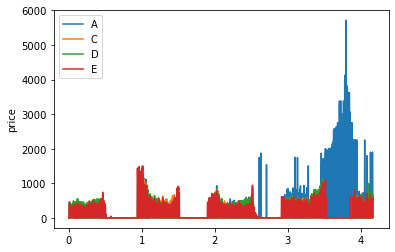

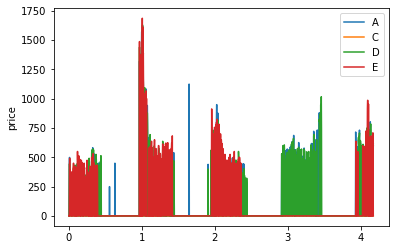

In [15]:
corp_list = train_RD['corporation'].unique().tolist()
loc_list = train_RD['location'].unique().tolist()
for loc in loc_list:
    for corp in corp_list:
        df = train_RD[(train_RD['corporation']==corp)&(train_RD['location']==loc)]
        sns.lineplot(x=df['timestamp'].reset_index().index/365, y='price', data=df)
    plt.legend(corp_list)
    plt.show()

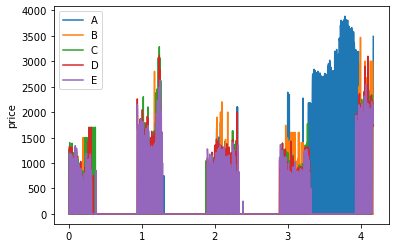

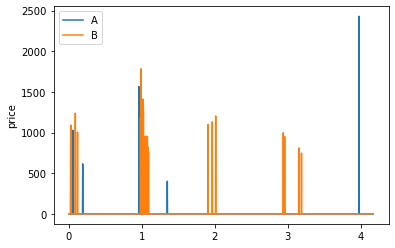

In [16]:
corp_list = train_CR['corporation'].unique().tolist()
loc_list = train_CR['location'].unique().tolist()
for loc in loc_list:
    for corp in corp_list:
        df = train_CR[(train_CR['corporation']==corp)&(train_CR['location']==loc)]
        sns.lineplot(x=df['timestamp'].reset_index().index/365, y='price', data=df)
    plt.legend(corp_list)
    plt.show()

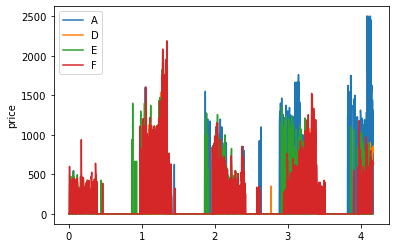

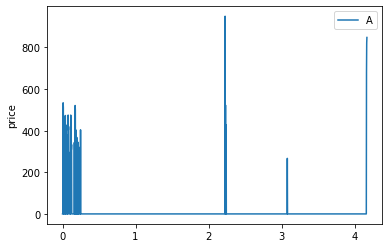

In [17]:
corp_list = train_CB['corporation'].unique().tolist()
loc_list = train_CB['location'].unique().tolist()
for loc in loc_list:
    for corp in corp_list:
        df = train_CB[(train_CB['corporation']==corp)&(train_CB['location']==loc)]
        sns.lineplot(x=df['timestamp'].reset_index().index/365, y='price', data=df)
    plt.legend(corp_list)
    plt.show()

## corp,item, location별 price 

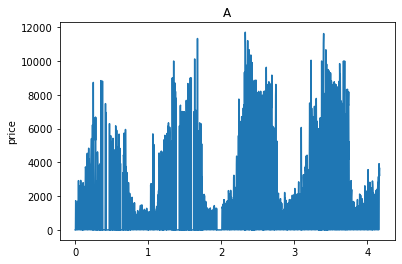

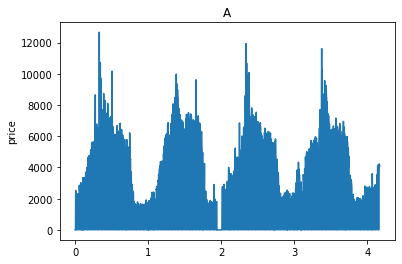

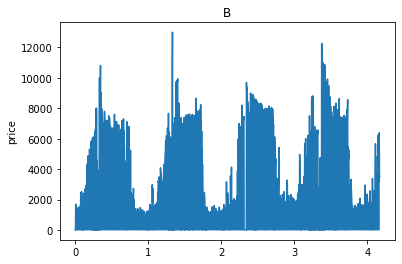

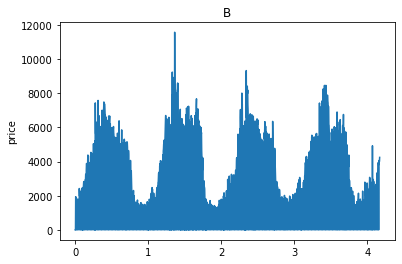

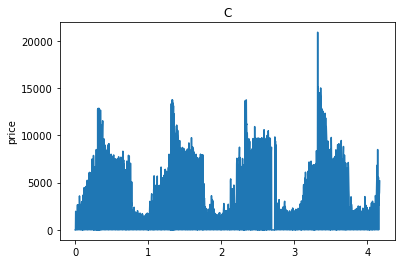

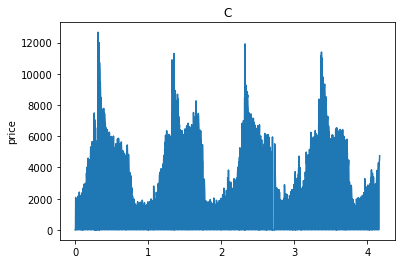

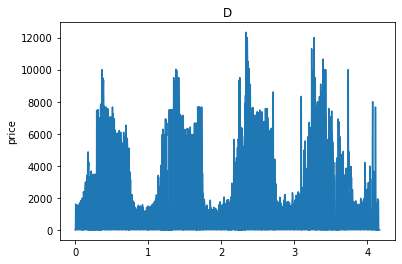

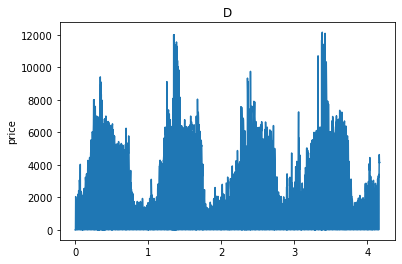

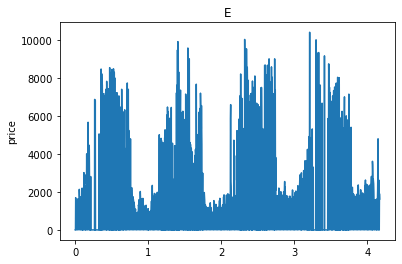

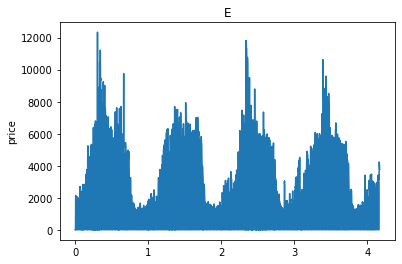

In [18]:
corp_list = train_TG['corporation'].unique().tolist()
loc_list = train_TG['location'].unique().tolist()
for corp in corp_list:
    for loc in loc_list:
        df = train_TG[(train_TG['corporation']==corp)&(train_TG['location']==loc)]
        sns.lineplot(x=df['timestamp'].reset_index().index/365, y='price', data=df)
        plt.title(corp)
        plt.show()

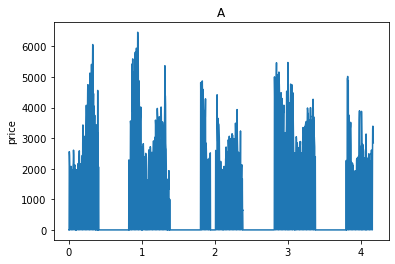

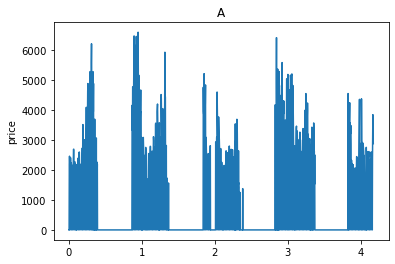

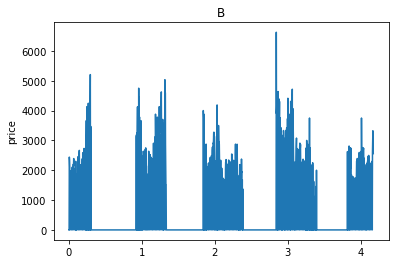

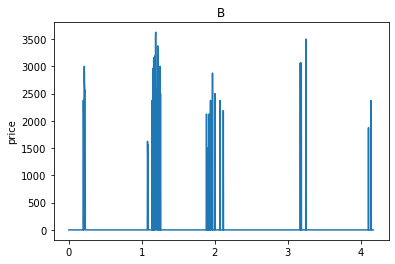

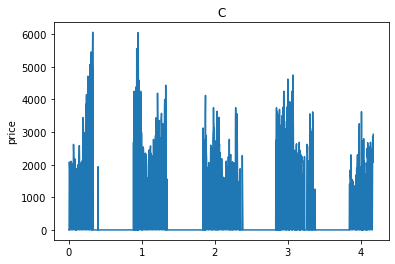

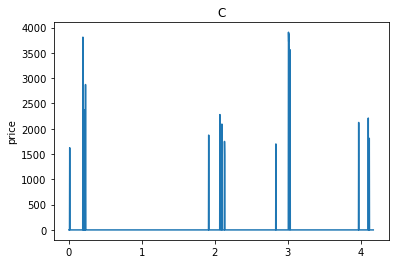

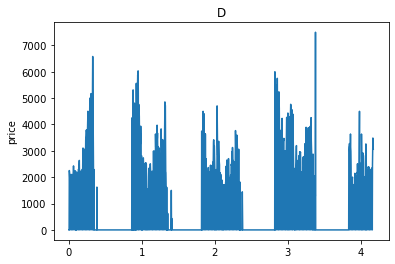

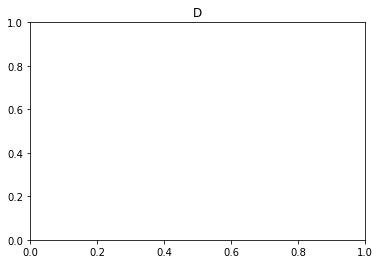

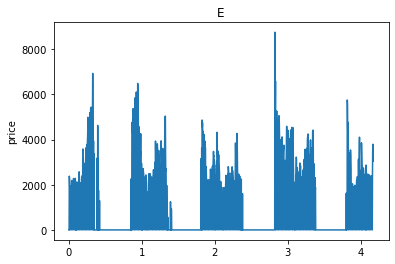

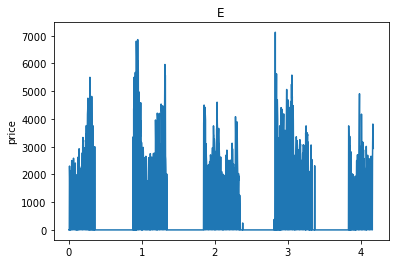

In [19]:
corp_list = train_BC['corporation'].unique().tolist()
loc_list = train_BC['location'].unique().tolist()
for corp in corp_list:
    for loc in loc_list:
        df = train_BC[(train_BC['corporation']==corp)&(train_BC['location']==loc)]
        sns.lineplot(x=df['timestamp'].reset_index().index/365, y='price', data=df)
        plt.title(corp)
        plt.show()

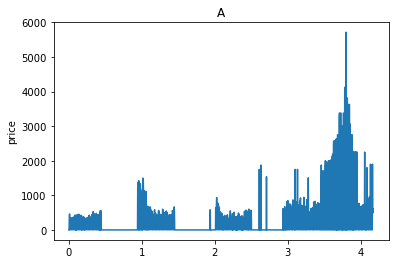

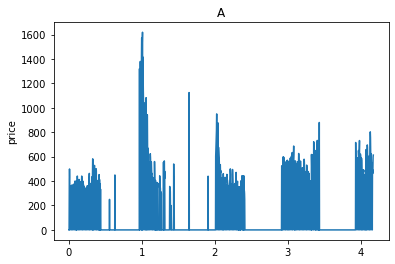

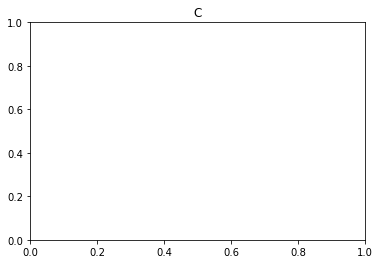

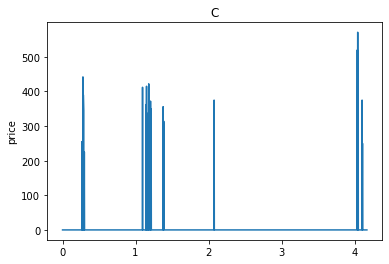

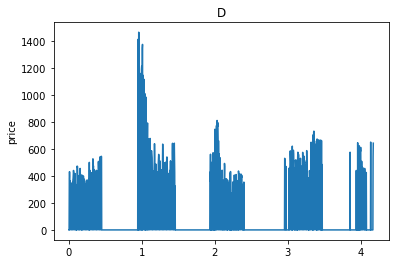

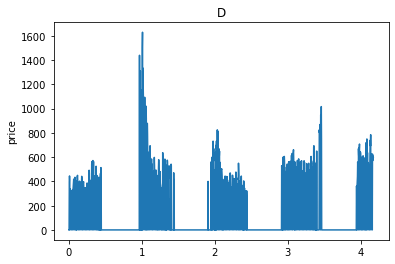

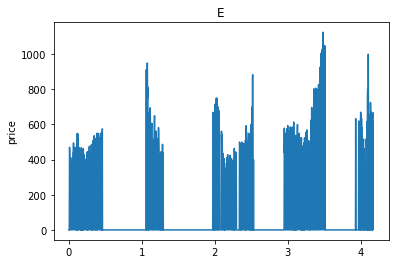

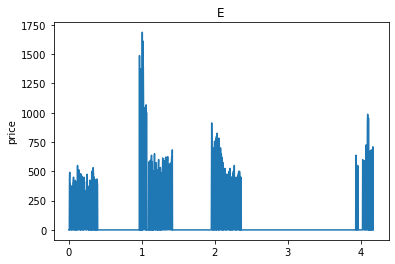

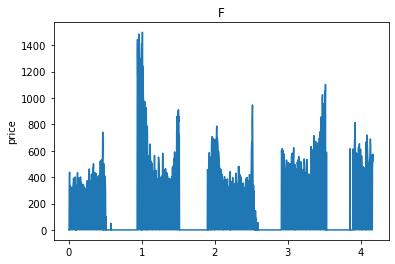

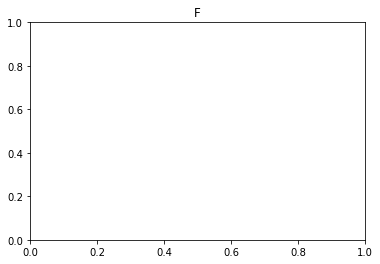

In [20]:
corp_list = train_RD['corporation'].unique().tolist()
loc_list = train_RD['location'].unique().tolist()
for corp in corp_list:
    for loc in loc_list:
        df = train_RD[(train_RD['corporation']==corp)&(train_RD['location']==loc)]
        sns.lineplot(x=df['timestamp'].reset_index().index/365, y='price', data=df)
        plt.title(corp)
        plt.show()

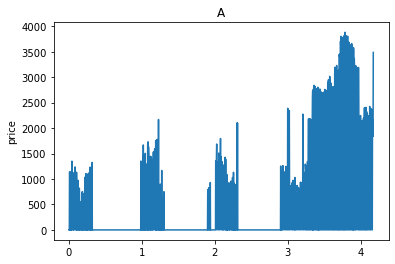

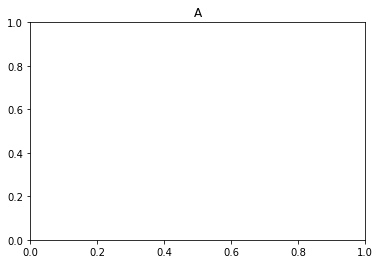

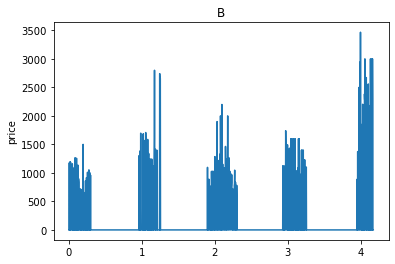

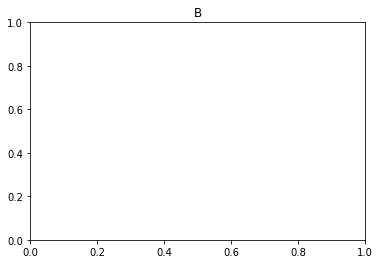

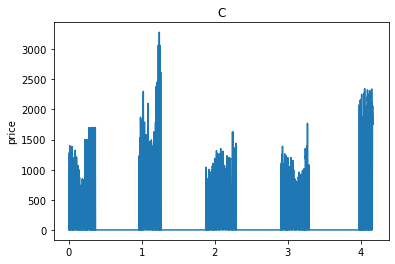

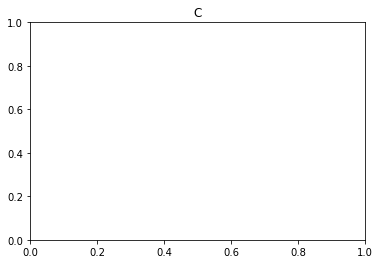

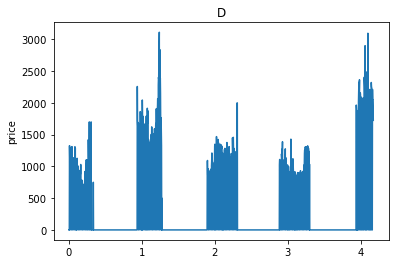

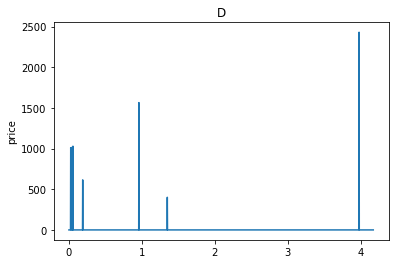

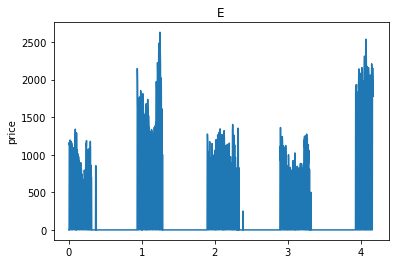

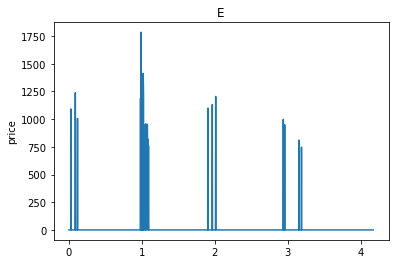

In [21]:
corp_list = train_CR['corporation'].unique().tolist()
loc_list = train_CR['location'].unique().tolist()
for corp in corp_list:
    for loc in loc_list:
        df = train_CR[(train_CR['corporation']==corp)&(train_CR['location']==loc)]
        sns.lineplot(x=df['timestamp'].reset_index().index/365, y='price', data=df)
        plt.title(corp)
        plt.show()

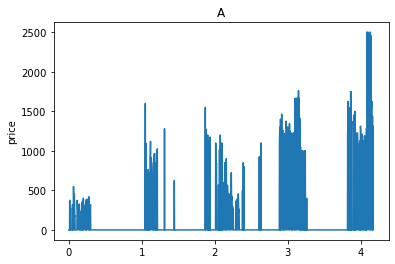

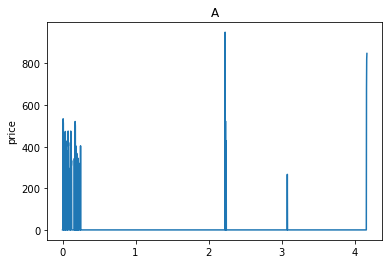

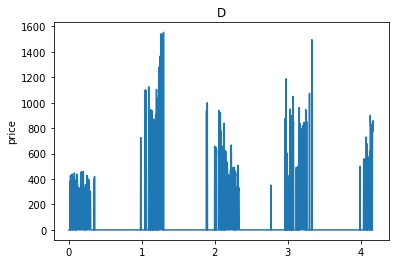

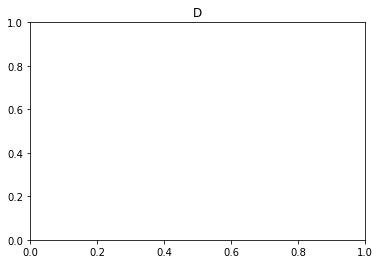

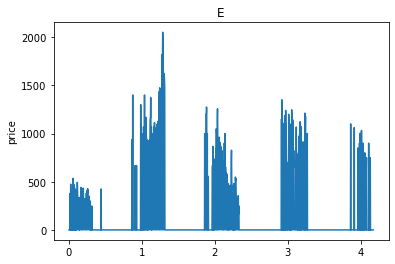

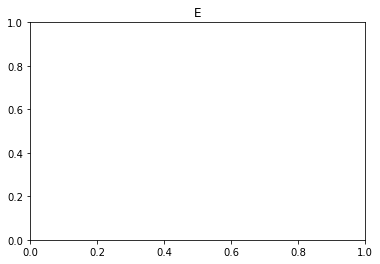

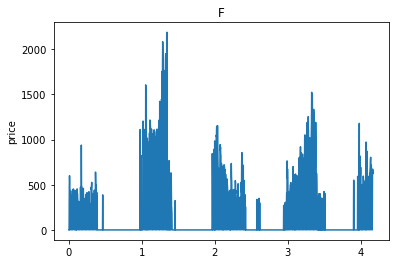

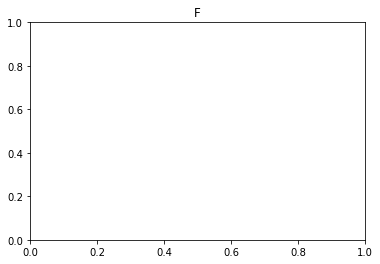

In [22]:
corp_list = train_CB['corporation'].unique().tolist()
loc_list = train_CB['location'].unique().tolist()
for corp in corp_list:
    for loc in loc_list:
        df = train_CB[(train_CB['corporation']==corp)&(train_CB['location']==loc)]
        sns.lineplot(x=df['timestamp'].reset_index().index/365, y='price', data=df)
        plt.title(corp)
        plt.show()

In [23]:
def make_train_list(dataset):
    corp_list=dataset['corporation'].unique().tolist()
    loc_list=dataset['location'].unique().tolist()
    
    dataset_len=[]
    for corp in corp_list:
        for loc in loc_list:
            dataset_len.append(len(dataset[(dataset['corporation']==corp)&
                                              (dataset['location']==loc)]))
    train_list=[]
    k=0
    for j in range(0, len(dataset_len)):
        if j == 0:
            train_list.append(dataset.loc[0:dataset_len[0]-1,:].reset_index(drop=True))
            k=dataset_len[0]
        else:
            train_list.append(dataset.loc[k:k+dataset_len[j]-1,:].reset_index(drop=True))            
            k=k+dataset_len[j]
            
    len_zero=[]            
    for i in range(0,len(train_list)):
        if len(train_list[i]) == 0:
            len_zero.append(i)
    if len(len_zero)!=0: 
        train_list = np.delete(train_list, len_zero)     
    
    for k in range(0, len(train_list)):
        print(train_list[k]['item'].unique() , train_list[k]['corporation'].unique() , train_list[k]['location'].unique() , len(train_list[k]))
    return dataset_len, train_list        

In [24]:
def make_test_list(dataset):
    corp_list=dataset['corporation'].unique().tolist()
    loc_list=dataset['location'].unique().tolist()
    
    dataset_len=[]
    for corp in corp_list:
        for loc in loc_list:
            dataset_len.append(len(dataset[(dataset['corporation']==corp)&
                                              (dataset['location']==loc)]))
    test_list=[]
    for j in range(0, len(dataset_len)):
        if j == 0:
            test_list.append(dataset.loc[0:dataset_len[0]-1,:].reset_index(drop=True))
            k=dataset_len[0]
        else:
            test_list.append(dataset.loc[k:k+dataset_len[j]-1,:].reset_index(drop=True))            
            k=k+dataset_len[j]
    
    len_zero=[]
    for i in range(0,len(test_list)):
        if len(test_list[i]) == 0:
            len_zero.append(i)
    if len(len_zero)!=0: 
        test_list = np.delete(test_list, len_zero)        
            
    for k in range(0, len(test_list)):
        print(test_list[k]['item'].unique() , test_list[k]['corporation'].unique() , test_list[k]['location'].unique() , len(test_list[k]))
    return dataset_len, test_list        

## 1. 감귤(TG) 결측치 보간

1/1, 설날, 추석, 일요일을 제외한 모든 공휴일 및 평일 결측치 보간  
보간 방법은 일요일을 제외한 price에서 선형보간을 이용

In [25]:
train_TG1=train_TG[train_TG['weekdays'] != 6]
train_TG1['price'].replace(0, np.nan, inplace=True)
train_TG1.loc[(train_TG1['month']==1)&(train_TG1['day']==1), 'price']=0
train_TG1['price']=train_TG1['price'].interpolate(method='linear')
train_TG1

,timestamp,item,corporation,location,supply,price,year,month,day,weekdays,holiday,price_zero
0,2019-01-01,TG,A,J,0.0,0.0,2019,1,1,1,1,1
1,2019-01-02,TG,A,J,0.0,864.0,2019,1,2,2,0,1
2,2019-01-03,TG,A,J,60601.0,1728.0,2019,1,3,3,0,0
3,2019-01-04,TG,A,J,25000.0,1408.0,2019,1,4,4,0,0
4,2019-01-05,TG,A,J,32352.0,1250.0,2019,1,5,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15225,2023-02-27,TG,E,S,24204.0,3418.0,2023,2,27,0,0,0
15226,2023-02-28,TG,E,S,13587.0,3141.0,2023,2,28,1,0,0
15227,2023-03-01,TG,E,S,16187.0,4235.0,2023,3,1,2,1,0
15228,2023-03-02,TG,E,S,17830.0,3960.0,2023,3,2,3,0,0


In [26]:
train_TG[train_TG['weekdays'] != 6]=train_TG1

In [27]:
holiday_list=['2019-01-02', '2020-01-02', '2021-01-02',
              '2022-01-02', '2023-01-02'
              '2019-02-04', '2019-02-05', '2019-02-06',
              '2019-09-12', '2019-09-13', '2019-09-14',
              '2020-01-25', '2020-01-26', '2020-01-27',
              '2020-10-01', '2020-10-02', '2020-10-03',
              '2021-02-12', '2021-02-13',
              '2021-09-20', '2021-09-21', '2021-09-22',
              '2022-01-31', '2022-02-01', '2022-02-02',
              '2022-09-10', '2022-09-11', '2022-09-12',
              '2023-01-22', '2023-01-23', '2023-01-24']

for holiday in holiday_list:
    train_TG.loc[train_TG['timestamp']==holiday, 'price']=0  
# train_TG[(train_TG['price']==0)&(train_TG['year']==2023)].head(10)

In [28]:
train_TG.loc[train_TG['weekdays']==6, 'price']=0
train_TG.loc[train_TG['weekdays']==6, 'supply']=0
train_TG.loc[train_TG['price']==0, 'price_zero']=1
train_TG.loc[train_TG['price']>0, 'price_zero']=0
train_TG['price_zero']=train['price_zero'].astype('int')

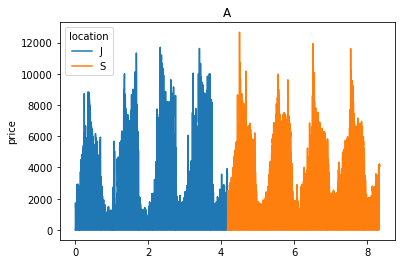

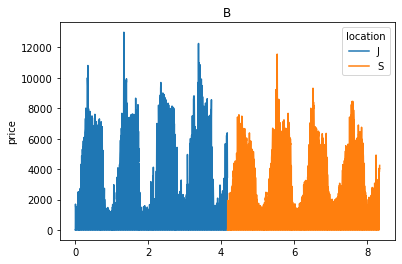

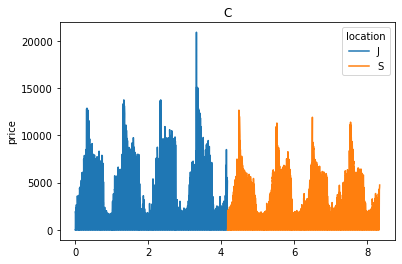

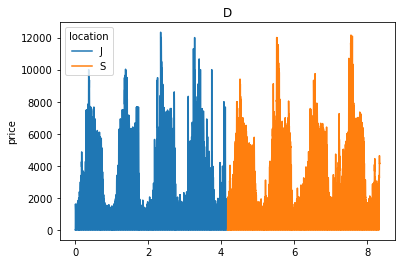

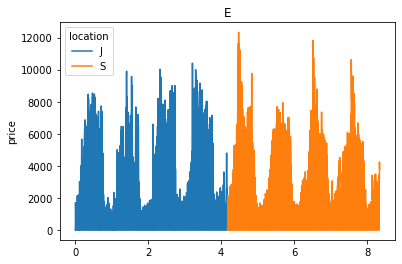

In [29]:
corp_list = train_TG['corporation'].unique().tolist()
loc_list = train_TG['location'].unique().tolist()
for corp in corp_list:
    df = train_TG[(train_TG['corporation']==corp)]
    sns.lineplot(x=df['timestamp'].reset_index().index/365, y='price', data=df, hue='location')
    plt.title(corp)
    plt.show()

In [30]:
TG_len,train_TG_list=make_train_list(train_TG)

['TG'] ['A'] ['J'] 1523
['TG'] ['A'] ['S'] 1523
['TG'] ['B'] ['J'] 1523
['TG'] ['B'] ['S'] 1523
['TG'] ['C'] ['J'] 1523
['TG'] ['C'] ['S'] 1523
['TG'] ['D'] ['J'] 1523
['TG'] ['D'] ['S'] 1523
['TG'] ['E'] ['J'] 1523
['TG'] ['E'] ['S'] 1523


In [31]:
TG_len,test_TG_list=make_test_list(test_TG)

['TG'] ['A'] ['J'] 28
['TG'] ['A'] ['S'] 28
['TG'] ['B'] ['J'] 28
['TG'] ['B'] ['S'] 28
['TG'] ['C'] ['J'] 28
['TG'] ['C'] ['S'] 28
['TG'] ['D'] ['J'] 28
['TG'] ['D'] ['S'] 28
['TG'] ['E'] ['J'] 28
['TG'] ['E'] ['S'] 28


In [32]:
for list in train_TG_list:
    max=np.quantile(list['price'], 0.995)
    list.loc[list['price']>max, 'price']=max

<AxesSubplot:xlabel='timestamp', ylabel='price'>

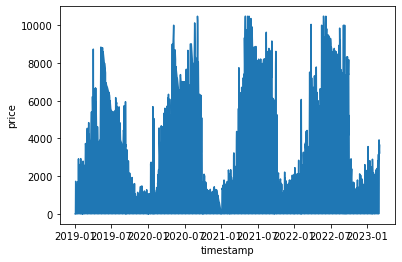

In [33]:
sns.lineplot(x=train_TG_list[0]['timestamp'], y=train_TG_list[0]['price'])

## 2. 브로콜리(BC) 결측치 보간

In [34]:
train_BC=train_BC.reset_index(drop=True)
train_BC['price']=train_BC['price'].interpolate(method='linear')
train_BC.loc[train_BC['weekdays']==6, 'price']=0
train_BC.groupby(['corporation', 'location']).count()

timestamp  item  supply  price  year  month   day  \
corporation location                                                      
A           J              1523  1523    1523   1523  1523   1523  1523   
            S              1523  1523    1523   1523  1523   1523  1523   
B           J              1523  1523    1523   1523  1523   1523  1523   
            S              1523  1523    1523   1523  1523   1523  1523   
C           J              1523  1523    1523   1523  1523   1523  1523   
            S              1523  1523    1523   1523  1523   1523  1523   
D           J              1523  1523    1523   1523  1523   1523  1523   
E           J              1523  1523    1523   1523  1523   1523  1523   
            S              1523  1523    1523   1523  1523   1523  1523   

                      weekdays  holiday  price_zero  
corporation location                                 
A           J             1523     1523        1523  
            S             1523     1523        1523  
B           J             1523     1523        1523  
            S             1523     1523        1523  
C           J             1523     1523        1523  
            S             1523     1523        1523  
D           J             1523     1523        1523  
E           J             1523     1523        1523  
            S             1523     1523        1523

In [35]:
BC_len, train_BC_list=make_train_list(train_BC)

['BC'] ['A'] ['J'] 1523
['BC'] ['A'] ['S'] 1523
['BC'] ['B'] ['J'] 1523
['BC'] ['B'] ['S'] 1523
['BC'] ['C'] ['J'] 1523
['BC'] ['C'] ['S'] 1523
['BC'] ['D'] ['J'] 1523
['BC'] ['E'] ['J'] 1523
['BC'] ['E'] ['S'] 1523


In [36]:
BC_len, test_BC_list=make_test_list(test_BC)

['BC'] ['A'] ['J'] 28
['BC'] ['A'] ['S'] 28
['BC'] ['B'] ['J'] 28
['BC'] ['B'] ['S'] 28
['BC'] ['C'] ['J'] 28
['BC'] ['C'] ['S'] 28
['BC'] ['D'] ['J'] 28
['BC'] ['E'] ['J'] 28
['BC'] ['E'] ['S'] 28


In [37]:
for list in train_BC_list:
    max=np.quantile(list['price'], 0.995)
    list.loc[list['price']>max, 'price']=max

## 3. 무(RD) 결측치 보간

In [38]:
train_RD=train_RD.drop(train_RD[train_RD['year']==2022].index)
train_RD['price']=train_RD['price'].interpolate(method='linear')
train_RD.loc[train_RD['weekdays']==6, 'price']=0
train_RD=train_RD.reset_index(drop=True)
train_RD.groupby(['corporation', 'location']).count()

timestamp  item  supply  price  year  month   day  \
corporation location                                                      
A           J              1158  1158    1158   1158  1158   1158  1158   
            S              1158  1158    1158   1158  1158   1158  1158   
C           S              1158  1158    1158   1158  1158   1158  1158   
D           J              1158  1158    1158   1158  1158   1158  1158   
            S              1158  1158    1158   1158  1158   1158  1158   
E           J              1158  1158    1158   1158  1158   1158  1158   
            S              1158  1158    1158   1158  1158   1158  1158   
F           J              1158  1158    1158   1158  1158   1158  1158   

                      weekdays  holiday  price_zero  
corporation location                                 
A           J             1158     1158        1158  
            S             1158     1158        1158  
C           S             1158     1158        1158  
D           J             1158     1158        1158  
            S             1158     1158        1158  
E           J             1158     1158        1158  
            S             1158     1158        1158  
F           J             1158     1158        1158

In [39]:
RD_len,train_RD_list=make_train_list(train_RD)

['RD'] ['A'] ['J'] 1158
['RD'] ['A'] ['S'] 1158
['RD'] ['C'] ['S'] 1158
['RD'] ['D'] ['J'] 1158
['RD'] ['D'] ['S'] 1158
['RD'] ['E'] ['J'] 1158
['RD'] ['E'] ['S'] 1158
['RD'] ['F'] ['J'] 1158


In [40]:
RD_len,test_RD_list=make_test_list(test_RD)

['RD'] ['A'] ['J'] 28
['RD'] ['A'] ['S'] 28
['RD'] ['C'] ['S'] 28
['RD'] ['D'] ['J'] 28
['RD'] ['D'] ['S'] 28
['RD'] ['E'] ['J'] 28
['RD'] ['E'] ['S'] 28
['RD'] ['F'] ['J'] 28


## 4. 당근(CR) 결측치 보간

In [41]:
train_CR=train_CR.drop(train_CR[train_CR['year']==2022].index)
train_CR=train_CR.reset_index(drop=True)
train_CR['price']=train_CR['price'].interpolate(method='linear')
train_CR.loc[train_CR['weekdays']==6, 'price']=0
train_CR.groupby(['corporation', 'location']).count()

timestamp  item  supply  price  year  month   day  \
corporation location                                                      
A           J              1158  1158    1158   1158  1158   1158  1158   
B           J              1158  1158    1158   1158  1158   1158  1158   
C           J              1158  1158    1158   1158  1158   1158  1158   
D           J              1158  1158    1158   1158  1158   1158  1158   
            S              1158  1158    1158   1158  1158   1158  1158   
E           J              1158  1158    1158   1158  1158   1158  1158   
            S              1158  1158    1158   1158  1158   1158  1158   

                      weekdays  holiday  price_zero  
corporation location                                 
A           J             1158     1158        1158  
B           J             1158     1158        1158  
C           J             1158     1158        1158  
D           J             1158     1158        1158  
            S             1158     1158        1158  
E           J             1158     1158        1158  
            S             1158     1158        1158

In [42]:
CR_len,train_CR_list=make_train_list(train_CR)

['CR'] ['A'] ['J'] 1158
['CR'] ['B'] ['J'] 1158
['CR'] ['C'] ['J'] 1158
['CR'] ['D'] ['J'] 1158
['CR'] ['D'] ['S'] 1158
['CR'] ['E'] ['J'] 1158
['CR'] ['E'] ['S'] 1158


In [43]:
CR_len,test_CR_list=make_test_list(test_CR)

['CR'] ['A'] ['J'] 28
['CR'] ['B'] ['J'] 28
['CR'] ['C'] ['J'] 28
['CR'] ['D'] ['J'] 28
['CR'] ['D'] ['S'] 28
['CR'] ['E'] ['J'] 28
['CR'] ['E'] ['S'] 28


## 5. 양배추(CB) 결측치 보간

In [44]:
train_CB=train_CB.reset_index(drop=True)
train_CB['price']=train_CB['price'].interpolate(method='linear')
train_CB.loc[train_CB['weekdays']==6, 'price']=0
train_CB.groupby(['corporation', 'location']).count()

timestamp  item  supply  price  year  month   day  \
corporation location                                                      
A           J              1523  1523    1523   1523  1523   1523  1523   
            S              1523  1523    1523   1523  1523   1523  1523   
D           J              1523  1523    1523   1523  1523   1523  1523   
E           J              1523  1523    1523   1523  1523   1523  1523   
F           J              1523  1523    1523   1523  1523   1523  1523   

                      weekdays  holiday  price_zero  
corporation location                                 
A           J             1523     1523        1523  
            S             1523     1523        1523  
D           J             1523     1523        1523  
E           J             1523     1523        1523  
F           J             1523     1523        1523

In [45]:
CB_len,train_CB_list=make_train_list(train_CB)

['CB'] ['A'] ['J'] 1523
['CB'] ['A'] ['S'] 1523
['CB'] ['D'] ['J'] 1523
['CB'] ['E'] ['J'] 1523
['CB'] ['F'] ['J'] 1523


In [46]:
CB_len,test_CB_list=make_test_list(test_CB)

['CB'] ['A'] ['J'] 28
['CB'] ['A'] ['S'] 28
['CB'] ['D'] ['J'] 28
['CB'] ['E'] ['J'] 28
['CB'] ['F'] ['J'] 28


In [47]:
for list in train_CB_list:
    max=np.quantile(list['price'], 0.995)
    list.loc[list['price']>max, 'price']=max

In [48]:
save_directory = '../DAT/'

In [49]:
for i, df in enumerate(train_TG_list, 1):
    filename = f'train_TG_{i}.csv'
    file_path = save_directory + filename
    df.to_csv(file_path, index=False)
    print(f'DataFrame {i}이(가) {file_path}에 저장되었습니다.')

DataFrame 1이(가) ../DAT/train_TG_1.csv에 저장되었습니다.
DataFrame 2이(가) ../DAT/train_TG_2.csv에 저장되었습니다.
DataFrame 3이(가) ../DAT/train_TG_3.csv에 저장되었습니다.
DataFrame 4이(가) ../DAT/train_TG_4.csv에 저장되었습니다.
DataFrame 5이(가) ../DAT/train_TG_5.csv에 저장되었습니다.
DataFrame 6이(가) ../DAT/train_TG_6.csv에 저장되었습니다.
DataFrame 7이(가) ../DAT/train_TG_7.csv에 저장되었습니다.
DataFrame 8이(가) ../DAT/train_TG_8.csv에 저장되었습니다.
DataFrame 9이(가) ../DAT/train_TG_9.csv에 저장되었습니다.
DataFrame 10이(가) ../DAT/train_TG_10.csv에 저장되었습니다.


In [50]:
for i, df in enumerate(train_BC_list, 1):
    filename = f'train_BC_{i}.csv'
    file_path = save_directory + filename
    df.to_csv(file_path, index=False)
    print(f'DataFrame {i}이(가) {file_path}에 저장되었습니다.')

DataFrame 1이(가) ../DAT/train_BC_1.csv에 저장되었습니다.
DataFrame 2이(가) ../DAT/train_BC_2.csv에 저장되었습니다.
DataFrame 3이(가) ../DAT/train_BC_3.csv에 저장되었습니다.
DataFrame 4이(가) ../DAT/train_BC_4.csv에 저장되었습니다.
DataFrame 5이(가) ../DAT/train_BC_5.csv에 저장되었습니다.
DataFrame 6이(가) ../DAT/train_BC_6.csv에 저장되었습니다.
DataFrame 7이(가) ../DAT/train_BC_7.csv에 저장되었습니다.
DataFrame 8이(가) ../DAT/train_BC_8.csv에 저장되었습니다.
DataFrame 9이(가) ../DAT/train_BC_9.csv에 저장되었습니다.


In [51]:
for i, df in enumerate(train_RD_list, 1):
    filename = f'train_RD_{i}.csv'
    file_path = save_directory + filename
    df.to_csv(file_path, index=False)
    print(f'DataFrame {i}이(가) {file_path}에 저장되었습니다.')

DataFrame 1이(가) ../DAT/train_RD_1.csv에 저장되었습니다.
DataFrame 2이(가) ../DAT/train_RD_2.csv에 저장되었습니다.
DataFrame 3이(가) ../DAT/train_RD_3.csv에 저장되었습니다.
DataFrame 4이(가) ../DAT/train_RD_4.csv에 저장되었습니다.
DataFrame 5이(가) ../DAT/train_RD_5.csv에 저장되었습니다.
DataFrame 6이(가) ../DAT/train_RD_6.csv에 저장되었습니다.
DataFrame 7이(가) ../DAT/train_RD_7.csv에 저장되었습니다.
DataFrame 8이(가) ../DAT/train_RD_8.csv에 저장되었습니다.


In [52]:
for i, df in enumerate(train_CR_list, 1):
    filename = f'train_CR_{i}.csv'
    file_path = save_directory + filename
    df.to_csv(file_path, index=False)
    print(f'DataFrame {i}이(가) {file_path}에 저장되었습니다.')

DataFrame 1이(가) ../DAT/train_CR_1.csv에 저장되었습니다.
DataFrame 2이(가) ../DAT/train_CR_2.csv에 저장되었습니다.
DataFrame 3이(가) ../DAT/train_CR_3.csv에 저장되었습니다.
DataFrame 4이(가) ../DAT/train_CR_4.csv에 저장되었습니다.
DataFrame 5이(가) ../DAT/train_CR_5.csv에 저장되었습니다.
DataFrame 6이(가) ../DAT/train_CR_6.csv에 저장되었습니다.
DataFrame 7이(가) ../DAT/train_CR_7.csv에 저장되었습니다.


In [53]:
for i, df in enumerate(train_CB_list, 1):
    filename = f'train_CB_{i}.csv'
    file_path = save_directory + filename
    df.to_csv(file_path, index=False)
    print(f'DataFrame {i}이(가) {file_path}에 저장되었습니다.')

DataFrame 1이(가) ../DAT/train_CB_1.csv에 저장되었습니다.
DataFrame 2이(가) ../DAT/train_CB_2.csv에 저장되었습니다.
DataFrame 3이(가) ../DAT/train_CB_3.csv에 저장되었습니다.
DataFrame 4이(가) ../DAT/train_CB_4.csv에 저장되었습니다.
DataFrame 5이(가) ../DAT/train_CB_5.csv에 저장되었습니다.


## 2. International trade

In [55]:
trade=pd.read_csv('../DAT/international_trade.csv')
trade.head()

,기간,품목명,수출 중량,수출 금액,수입 중량,수입 금액,무역수지
0,2019-01,토마토(신선한 것이나 냉장한 것으로 한정한다),356571,990,0,0,990
1,2019-01,양파,821330,222,4003206,1118,-896
2,2019-01,쪽파,60,1,93405,128,-127
3,2019-01,꽃양배추와 브로콜리(broccoli),160,1,638913,563,-562
4,2019-01,방울다다기 양배추,0,0,7580,38,-38


In [56]:
trade['품목명'].unique()

array(['토마토(신선한 것이나 냉장한 것으로 한정한다)', '양파', '쪽파', '꽃양배추와 브로콜리(broccoli)',
       '방울다다기 양배추', '양배추', '결구(結球) 상추',
       '위트루프 치커리(Witloof chicory)[시코리엄 인티부스 변종 포리오섬(Cichorium intybus var. foliosum)]',
       '당근', '오이류(신선한 것이나 냉장한 것으로 한정한다)',
       '콩[비그나(Vigna)속ㆍ파세러스(Phaseolus)속)]', '대추야자', '무화과', '파인애플',
       '망고(mango)', '망고스틴(mangosteen)', '오렌지', '감귤',
       '그레이프프루트(grapefruit)와 포멜로(pomelo)',
       '레몬[시트러스 리몬(Citrus limon)ㆍ시트러스 리머늄(Citrus limonum)]', '수박',
       '포포(papaw)[파파야(papaya)]', '사과', '배', '자두',
       '완두[피섬 새티범(Pisum sativum)]', '구아바(guava)', '살구',
       '신 체리[프루너스 체라서스(Prunus cerasus)]', '복숭아[넥터린(nectarine)을 포함한다]',
       '순무', '방울토마토', '샬롯(shallot)', '참외'], dtype=object)

In [45]:
trade=trade[trade.품목명.str.contains('감귤|브로콜리|무|당근|양배추')]
trade['품목명'].value_counts()

꽃양배추와 브로콜리(broccoli)    50
방울다다기 양배추               50
양배추                     50
당근                      50
무화과                     50
감귤                      50
순무                       6
Name: 품목명, dtype: int64

In [46]:
trade.loc[trade['품목명']=='꽃양배추와 브로콜리(broccoli)','품목명'] = '브로콜리'
trade.loc[trade['품목명']=='순무','품목명'] = '무'
trade = trade[trade['품목명']!='무화과']
trade = trade[trade['품목명']!='방울다다기 양배추']

In [47]:
trade['품목명'].value_counts()

브로콜리    50
양배추     50
당근      50
감귤      50
무        6
Name: 품목명, dtype: int64

In [48]:
fruits_dict = {'감귤':'TG' ,'브로콜리':'BC' ,'무':'RD' ,'당근':'CR' ,'양배추':'CB'}
trade['품목명'] = trade['품목명'].map(fruits_dict)
trade=trade.reset_index(drop=True)

In [49]:
trade['수출 중량/수출 금액']=trade['수출 중량']/trade['수출 금액']
trade['수입 중량/수입 금액']=trade['수입 중량']/trade['수입 금액']

In [50]:
trade

,기간,품목명,수출 중량,수출 금액,수입 중량,수입 금액,무역수지,수출 중량/수출 금액,수입 중량/수입 금액
0,2019-01,BC,160,1,638913,563,-562,160.000000,1134.836590
1,2019-01,CB,184650,94,395802,90,4,1964.361702,4397.800000
2,2019-01,CR,23150,22,7466150,2955,-2934,1052.272727,2526.615905
3,2019-01,TG,58368,172,0,0,172,339.348837,NaN
4,2019-02,BC,780,1,396870,399,-398,780.000000,994.661654
...,...,...,...,...,...,...,...,...,...
201,2023-02,BC,24,0,332640,352,-352,inf,945.000000
202,2023-02,CB,13188,13,377456,104,-91,1014.461538,3629.384615
203,2023-02,CR,22510,20,9260020,3758,-3737,1125.500000,2464.081958
204,2023-02,RD,4000,4,2,0,4,1000.000000,inf


In [58]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumGothic'

C:\Users\gksxk\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


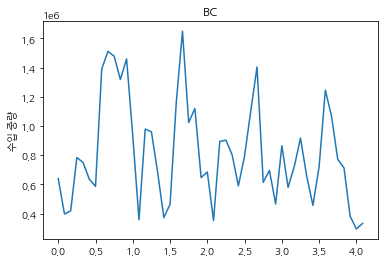

C:\Users\gksxk\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


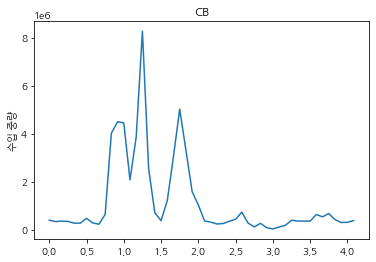

C:\Users\gksxk\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


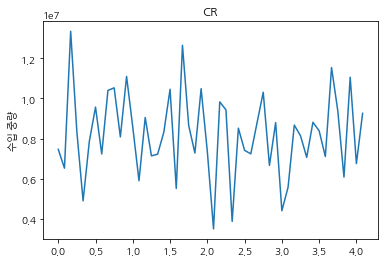

C:\Users\gksxk\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


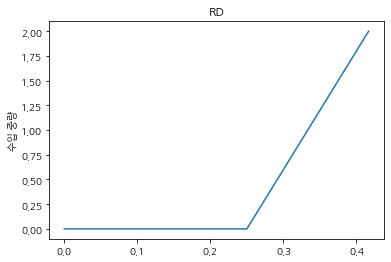

C:\Users\gksxk\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


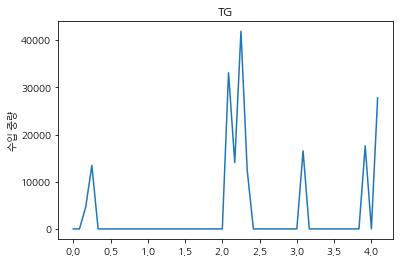

In [82]:
trade_item_list=sorted(trade['품목명'].unique().tolist())
for item in trade_item_list:
    df = trade[(trade['품목명']==item)]
    sns.lineplot((df['기간'].reset_index().index)/12, df['수입 중량'])
    plt.title(item)
    plt.show()